## Image Addition ==>cv2.add()

In [1]:
import numpy as np

In [2]:
x=np.uint8([200])
y=np.uint8([60])

In [3]:
x+y # modulo operation

array([4], dtype=uint8)

In [4]:
import cv2

In [5]:
cv2.add(x,y) #

array([[255]], dtype=uint8)

## Image Blending (transparent effect)==>cv2.addWeighted()

In [6]:
img1=cv2.imread("pic3.jpg")
img2=cv2.imread("pic4.jpeg")

In [7]:
from matplotlib import pyplot as plt

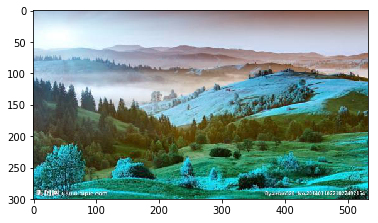

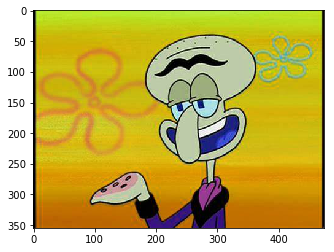

In [8]:
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

In [9]:
img1.shape

(300, 533, 3)

In [10]:
img2.shape

(355, 474, 3)

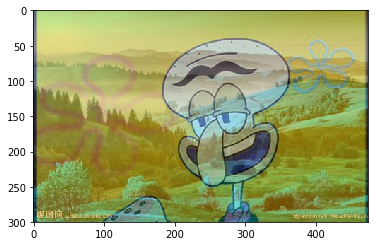

In [11]:
imgBlended=cv2.addWeighted(img1[0:300,0:474,:],0.5,img2[0:300,0:474,:],0.5,0)
plt.imshow(imgBlended)

## Bitwise Operation

In [12]:
rows1,cols1,channels1=img1.shape
rows2,cols2,channels2=img2.shape

In [13]:
rows1,cols1,channels1,rows2,cols2,channels2

(300, 533, 3, 355, 474, 3)

In [14]:
roi1=img1[0:rows1,0:cols2,:]
roi2=img2[0:rows1,0:cols2,:]

In [15]:
roi1.shape

(300, 474, 3)

In [16]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(img2gray,200,255,cv2.THRESH_BINARY)

In [17]:
mask_inv=cv2.bitwise_not(mask)

In [18]:
mask_inv

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

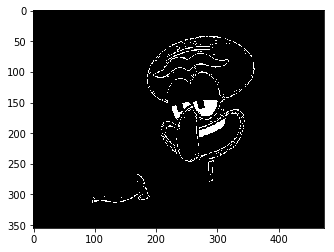

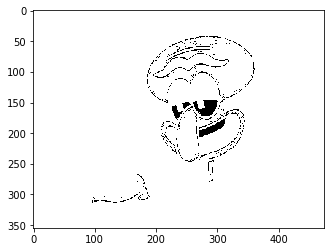

In [19]:
plt.imshow(mask,cmap="gray")
plt.figure()
plt.imshow(mask_inv,cmap="gray")

In [24]:
maskToUse=mask[0:rows1,0:cols2]
maskToUse_Inv=mask_inv[0:rows1,0:cols2]
img1_bg=cv2.bitwise_and(roi1,roi1,mask=maskToUse_Inv)
img2_fg=cv2.bitwise_and(roi2-150,roi2-150,mask=maskToUse)

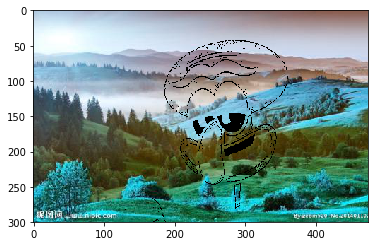

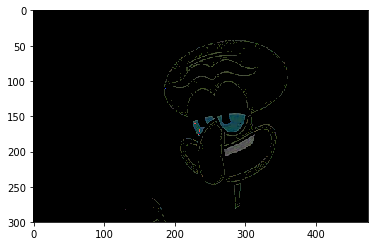

In [25]:
plt.imshow(img1_bg)
plt.figure()
plt.imshow(img2_fg)

In [26]:
dst=cv2.add(img1_bg,img2_fg)

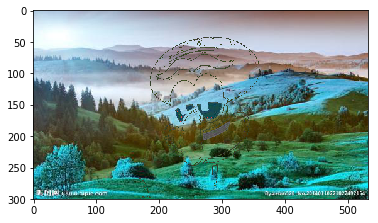

In [27]:
img1[0:rows1,0:cols2]=dst
plt.imshow(img1)